<a href="https://colab.research.google.com/github/micah-shull/pipelines/blob/main/pipelines_06_pytorch_pipeline_01_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to Feature Selection

Feature selection is a crucial step in the machine learning pipeline, aiming to identify the most relevant features that contribute to the predictive power of a model. This process not only enhances model performance but also reduces complexity, leading to more interpretable and efficient models. There are two primary approaches to feature selection: automated methods and manual selection.

#### Automated Feature Selection

Automated feature selection methods use statistical tests or model-based importance scores to objectively rank and select features. These methods are highly data-driven and rely on underlying statistics to ensure that the chosen features have a significant relationship with the target variable. Key advantages of automated methods include:

1. **Objectivity**:
   - Automated methods remove human bias, providing a consistent and reproducible way to select features based on data-driven criteria.

2. **Data-Driven**:
   - These methods ensure that the selected features are statistically significant, leading to better model performance and generalization.

3. **Reduction of Overfitting**:
   - Automated methods often incorporate techniques to prevent overfitting, ensuring that the selected features perform well on unseen data.

4. **Scalability**:
   - These methods can efficiently handle high-dimensional datasets, making them practical for large-scale applications.

#### Manual Feature Selection

Manual feature selection relies on domain knowledge and exploratory data analysis to choose relevant features. While this approach leverages the expertise and intuition of domain experts, it has several limitations:

1. **Subjectivity and Bias**:
   - Manual selection is prone to human biases and may not be as consistent as automated methods.

2. **Overfitting Risk**:
   - Without rigorous validation, manually selected features might lead to overfitting, especially if the chosen features are too closely tailored to the training data.

3. **Scalability Issues**:
   - Manually evaluating and selecting features becomes impractical for high-dimensional datasets due to the time and effort required.

#### Combining Automated Methods with Domain Knowledge

To achieve the best results, a balanced approach that combines automated feature selection with domain knowledge is often recommended:

1. **Initial Selection with Automated Methods**:
   - Use methods like `SelectKBest`, Recursive Feature Elimination (RFE), or model-based selection to perform an initial selection of features. These methods provide a robust and objective basis for feature selection.

2. **Refinement with Domain Knowledge**:
   - Review and refine the selected features based on domain expertise. This step ensures that important contextual insights are considered, which may not be captured by automated methods alone.

### Practical Workflow

1. **SelectKBest for Initial Selection**:
   - Apply `SelectKBest` to identify the top K features based on statistical tests such as ANOVA. This step provides an objective and reproducible way to rank features.

2. **Refine Features with Domain Knowledge**:
   - Combine the features selected by `SelectKBest` with additional features identified through domain knowledge. This ensures that crucial domain-specific features are included in the final feature set.

By leveraging the strengths of both automated methods and domain expertise, feature selection can be optimized to improve model performance, reduce overfitting, and ensure that the model is both effective and interpretable. This balanced approach helps create a more robust and generalizable machine learning model, ultimately leading to better predictive outcomes.

## Feature Selection Methods

1. **Univariate Feature Selection**: Using statistical tests to select features.
2. **Recursive Feature Elimination (RFE)**: Iteratively removing the least important features.
3. **Principal Component Analysis (PCA)**: Reducing dimensionality by transforming features into a new set of variables.
4. **Feature Importance from Models**: Using models that provide feature importance scores, such as Random Forests or Gradient Boosting.

Your outline for feature selection looks solid and covers a variety of methods to assess and select important features. Here's a brief explanation of each method you've listed, and how they fit into the feature selection process:

1. **Univariate Feature Selection**:
   - Uses statistical tests to select the features that have the strongest relationship with the target variable.
   - Common techniques include chi-square tests, ANOVA F-tests, and mutual information.

2. **Recursive Feature Elimination (RFE)**:
   - Iteratively removes the least important features based on a model's coefficients or feature importance scores.
   - Continues until the specified number of features is reached or until no further improvement is observed.
   - Works well with linear models, decision trees, and any model that can provide feature importance.

3. **Principal Component Analysis (PCA)**:
   - A dimensionality reduction technique that transforms the original features into a new set of uncorrelated variables called principal components.
   - The principal components are ordered by the amount of variance they explain, and you can select the top components to reduce the number of features while retaining most of the variance in the data.

4. **Feature Importance from Models**:
   - Utilizes models that can provide feature importance scores, such as Random Forests, Gradient Boosting, and XGBoost.
   - Features are ranked based on their importance scores, and the top features are selected.





#### Categorical Data Types

Changing data types such as `sex`, `education`, and `marriage` from numeric to categorical can be beneficial for several reasons:

1. **Representation of True Nature**: These variables represent discrete categories rather than continuous values. Treating them as categorical ensures the model interprets them correctly.

2. **Avoiding Misinterpretation**: Numeric encoding might imply a natural order or distance between values, which may not exist (e.g., `sex` with values 1 and 2). Using categorical encoding avoids this misinterpretation.

3. **Improved Model Performance**: Many machine learning algorithms can leverage categorical encodings more effectively. For instance, decision trees and their ensembles (like random forests) can make better splits on categorical data.

4. **Handling Missing Values**: Categorical variables can be imputed with a specific value like 'missing' without implying any numerical meaning, whereas imputing numeric variables typically involves statistical measures like mean or median.

5. **One-Hot Encoding**: Categorical data can be one-hot encoded, which creates binary columns for each category. This can help models learn relationships more effectively compared to single numeric columns.

By converting these columns to categorical, we ensure they are processed in a way that aligns with their nature and can lead to better model interpretability and performance.

#### Baseline Model with Catgeorical Features

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, precision_recall_curve, f1_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
df = pd.read_excel(url, header=1)

# Rename columns to lower case and replace spaces with underscores
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

# Convert specific numeric columns to categorical
categorical_columns = ['sex', 'education', 'marriage']
df[categorical_columns] = df[categorical_columns].astype('category')

# Select features and target (drop ID)
target = 'default_payment_next_month'
X = df.drop(columns=[target] + ['id'])
y = df[target]

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify column types
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Define preprocessing for numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define preprocessing for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Fit and transform the data
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
X_train_processed = preprocessing_pipeline.fit_transform(X_train)
X_test_processed = preprocessing_pipeline.transform(X_test)

# Apply RandomUnderSampler to balance the training dataset
undersampler = RandomUnderSampler(sampling_strategy=0.75, random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_processed, y_train)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_processed, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

optimal_threshold = 0.8000141978263855

# Define a simple neural network model
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the sklearn wrapper for the neural network model
class SklearnSimpleNN(BaseEstimator, ClassifierMixin):
    def __init__(self, input_dim, learning_rate=0.001, epochs=50, batch_size=64, pos_weight=1.0):
        self.input_dim = input_dim
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.pos_weight = pos_weight  # Accept as float
        self.model = SimpleNN(self.input_dim)

    def fit(self, X, y):
        # Convert pos_weight to tensor here
        criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor(self.pos_weight, dtype=torch.float32))
        optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        train_dataset = torch.utils.data.TensorDataset(torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32).unsqueeze(1))
        train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)

        for epoch in range(self.epochs):
            self.model.train()
            for inputs, targets in train_loader:
                optimizer.zero_grad()
                outputs = self.model(inputs)
                loss = criterion(outputs, targets.view(-1, 1))
                loss.backward()
                optimizer.step()
        return self

    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            outputs = self.model(torch.tensor(X, dtype=torch.float32))
            probabilities = torch.sigmoid(outputs)
            predictions = (probabilities > optimal_threshold).float()  # Use the manually adjusted threshold here
        return predictions.numpy().squeeze()

# Calculate the class weights
class_weights = len(y_train) / (2 * np.bincount(y_train))

# Create an instance of SklearnSimpleNN with the adjusted weight
input_dim = X_train_tensor.shape[1]
nn_estimator = SklearnSimpleNN(input_dim=input_dim, pos_weight=class_weights[1])

# Fit the model
nn_estimator.fit(X_train_tensor.numpy(), y_train_tensor.numpy())

# Predict on the test set with the optimal threshold
y_pred_baseline = nn_estimator.predict(X_test_tensor.numpy())

# Evaluate the model with the optimal threshold
print(classification_report(y_test_tensor.numpy(), y_pred_baseline))


              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      4673
         1.0       0.58      0.43      0.49      1327

    accuracy                           0.80      6000
   macro avg       0.71      0.67      0.69      6000
weighted avg       0.79      0.80      0.79      6000



In [2]:
# Plotting Function to Compare Performance

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

def plot_multiple_classification_reports(y_trues, y_preds, model_names, metrics=['precision', 'recall', 'f1-score'], palette="viridis"):
    reports = []
    for y_true, y_pred, model_name in zip(y_trues, y_preds, model_names):
        # Generate classification report
        report = classification_report(y_true, y_pred, output_dict=True)
        report_df = pd.DataFrame(report).transpose()
        # Drop the non-class rows
        report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')
        report_df['model'] = model_name
        reports.append(report_df)

    # Combine all reports into a single DataFrame
    combined_report = pd.concat(reports).reset_index().rename(columns={'index': 'class'})

    # Plot the results for each metric
    sns.set_context('notebook')
    plt.figure(figsize=(12, 8))
    fig, axes = plt.subplots(1, len(metrics), figsize=(18, 8), sharey=True)
    for ax, metric in zip(axes, metrics):
        sns.barplot(data=combined_report, x='class', y=metric, hue='model', palette=palette, ax=ax)
        ax.set_title(f'{metric.capitalize()}', fontsize=20)
        ax.set_xlabel('Classes')
        # ax.set_ylabel(metric.capitalize())
        ax.set_ylabel('')
        ax.tick_params(axis='x', rotation=90)
        ax.legend(title='Models', loc='upper right')

    plt.tight_layout()
    plt.show()


<Figure size 1200x800 with 0 Axes>

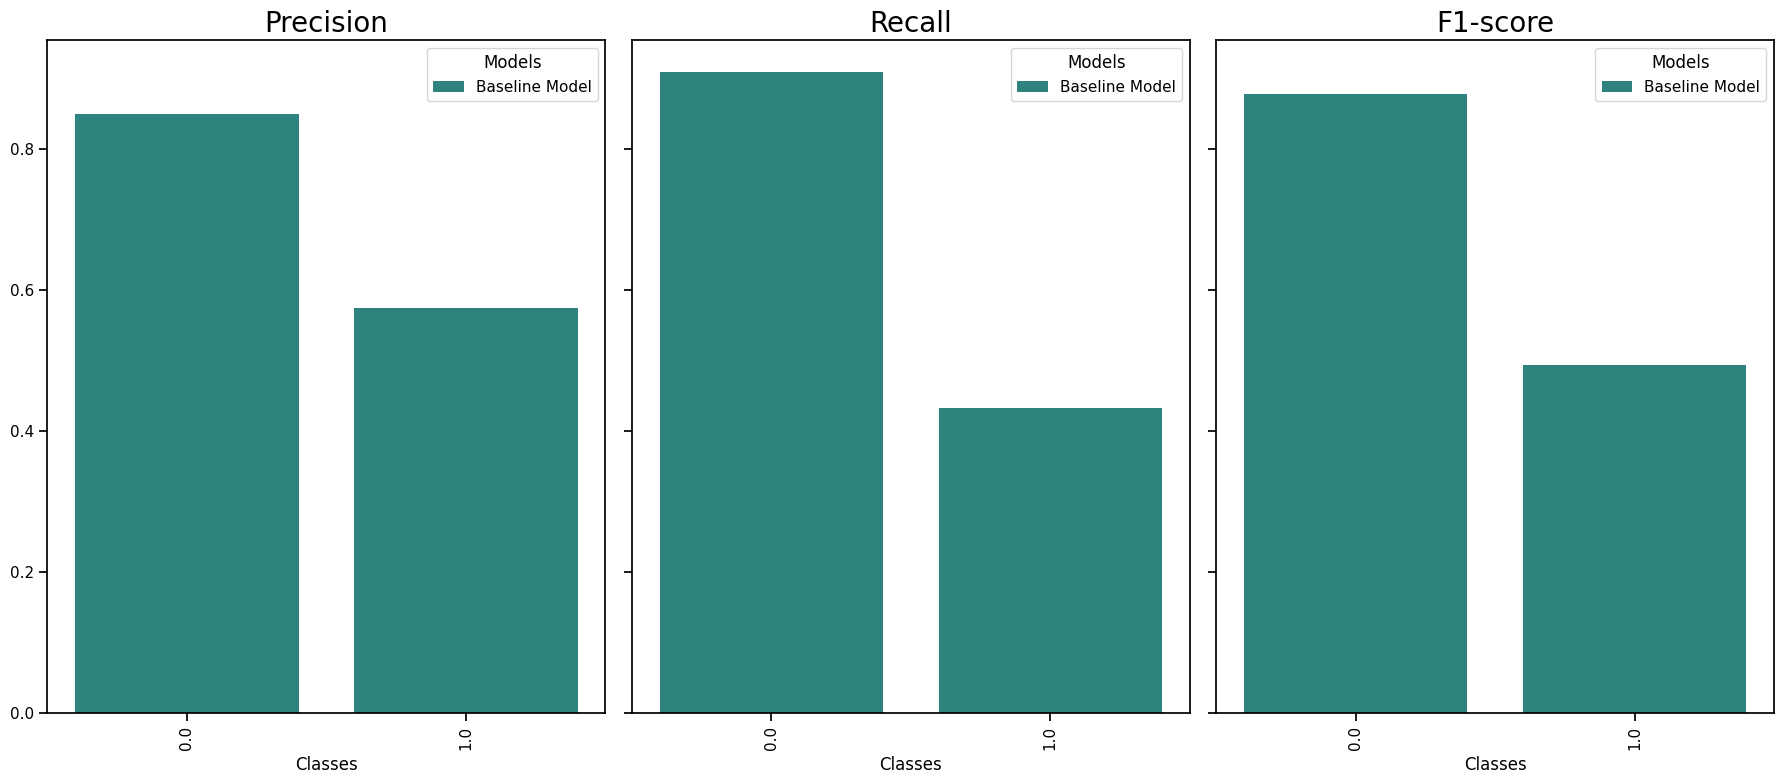

In [3]:
# plot comparisons
y_trues = [y_test_tensor.numpy()]
y_preds = [y_pred_baseline]
model_names = ['Baseline Model']
plot_multiple_classification_reports(y_trues, y_preds, model_names)

## Univariate Feature Selection Function (ANOVA)

We'll start with Univariate Feature Selection using ANOVA F-value and then move on to the other methods.

### Summary of ANOVA (Analysis of Variance)

**ANOVA (Analysis of Variance)** is a statistical technique used to determine if there are any statistically significant differences between the means of three or more independent (unrelated) groups. It essentially helps to test hypotheses about the means of different groups and is widely used in feature selection for machine learning.

### What ANOVA Does

1. **Hypothesis Testing**:
    - **Null Hypothesis (\(H_0\))**: Assumes that the means of different groups are equal.
    - **Alternative Hypothesis (\(H_1\))**: Assumes that at least one group's mean is different from the others.

2. **F-Statistic**:
    - ANOVA calculates an F-statistic, which is the ratio of the variance between the group means to the variance within the groups.
    - A higher F-statistic indicates that the group means are more spread out, suggesting a significant difference between groups.

3. **P-Value**:
    - The p-value associated with the F-statistic helps determine whether to reject the null hypothesis.
    - A low p-value (typically < 0.05) indicates that there is a significant difference between the group means.

### Types of ANOVA

1. **One-Way ANOVA**:
    - Used when comparing means of more than two groups based on one independent variable.
    
2. **Two-Way ANOVA**:
    - Used when comparing means with two independent variables. It can also evaluate the interaction between these variables.

### Application in Feature Selection

In the context of feature selection for machine learning, ANOVA can be used to select features that have the strongest relationship with the target variable:

1. **Univariate Feature Selection**:
    - ANOVA is used as a scoring function in techniques like `SelectKBest` to select the top features.
    - Features are scored based on their F-statistic with respect to the target variable.


### Iterating for Optimal Feature Selection

The idea behind iterating through `k` values for feature selection is to systematically determine the optimal number of features that maximize the performance of your machine learning model. Here's a step-by-step explanation of the concept:

1. **Goal**:
    - Identify the number of features that provide the best model performance.
    - Avoid selecting too few or too many features, which can lead to underfitting or overfitting, respectively.

2. **Method**:
    - **Range of `k` Values**: Define a range of values for `k`, where `k` is the number of top features to select. This range typically spans from 1 to the total number of features in the dataset.
    - **Model Evaluation for Each `k`**: For each value of `k`:
        - **Feature Selection**: Use a feature selection method (e.g., ANOVA with `SelectKBest`) to select the top `k` features.
        - **Model Training**: Train the machine learning model using only the selected features.
        - **Performance Measurement**: Evaluate the model's performance using a chosen metric, such as accuracy, precision, recall, or F1-score.

3. **Performance Comparison**:
    - **Collect Performance Metrics**: For each value of `k`, record the model's performance metrics.
    - **Plot/Analyze Results**: Plot the performance metrics against the values of `k` to visualize how the number of selected features affects the model's performance.
    - **Select Optimal `k`**: Identify the value of `k` that results in the best model performance. This optimal `k` represents the ideal number of features to use.

4. **Benefits**:
    - **Systematic Approach**: Provides a systematic way to determine the best number of features without arbitrary selection.
    - **Performance Optimization**: Helps in finding the balance between having enough features to capture the necessary information and avoiding irrelevant or redundant features that could harm model performance.

### Summary of Steps

1. **Define `k` Range**: Decide the range of `k` values to test (e.g., from 1 to the total number of features).
2. **Select Features**: For each `k`, select the top `k` features using a feature selection method.
3. **Train and Evaluate**: Train the model on the selected features and evaluate its performance.
4. **Collect Metrics**: Record performance metrics for each `k`.
5. **Analyze Results**: Plot the metrics against `k` to find the optimal number of features that maximize performance.

By iterating through different values of `k`, this method allows you to empirically determine the most effective subset of features for your machine learning model, ensuring robust and optimized performance.

#### Ensuring Reproducibility

Seeing different F1 scores on reruns can be normal, especially in the context of machine learning, due to various sources of randomness in your pipeline. Here are some common reasons for the variability:

1. **Random Initialization of Neural Networks**:
    - The weights of the neural network are initialized randomly. Different initializations can lead to different training outcomes.
  
2. **Random Sampling in Data Splitting**:
    - The train-test split or cross-validation process may involve randomness unless a fixed random seed is used.
  
3. **Random Undersampling**:
    - The `RandomUnderSampler` introduces randomness in how the majority class samples are undersampled.

To minimize variability and make results more reproducible, you can set random seeds for all operations that involve randomness. Here's how you can modify your code to include random seeds:


Optimal number of features: 23


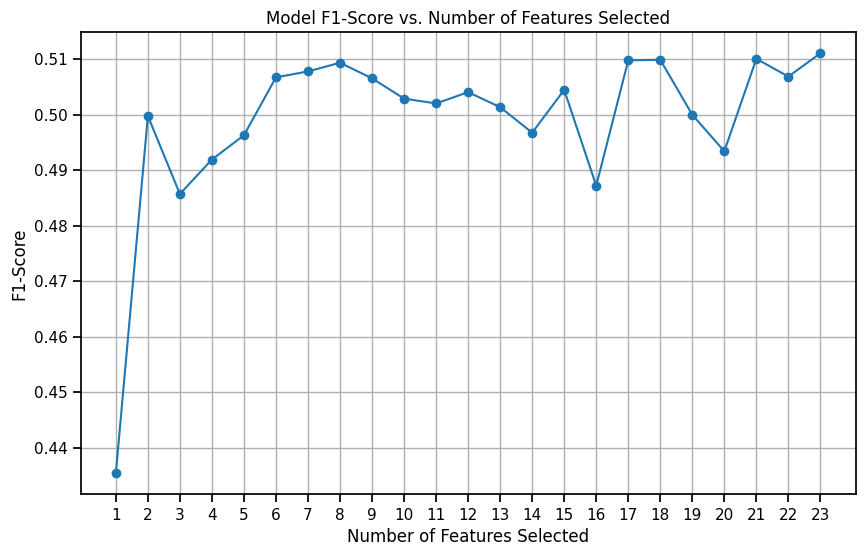

In [4]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline as SklearnPipeline
from sklearn.metrics import f1_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import torch
import numpy as np
import random

# Set random seed for reproducibility
def set_seed(seed):
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Set the seed
set_seed(42)

# Function to evaluate model performance and get selected features
def evaluate_model(X_train, y_train, X_test, y_test, k):
    # Create a pipeline with preprocessing and feature selection
    feature_selection_pipeline = SklearnPipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(score_func=f_classif, k=k))
    ])

    # Fit and transform the training data
    X_train_selected = feature_selection_pipeline.fit_transform(X_train, y_train)
    X_test_selected = feature_selection_pipeline.transform(X_test)

    # Get the selected feature indices
    selector = feature_selection_pipeline.named_steps['feature_selection']
    selected_feature_indices = selector.get_support(indices=True)

    # Get feature names after preprocessing
    preprocessor_transformer = feature_selection_pipeline.named_steps['preprocessor']
    preprocessed_feature_names = np.array(X_train.columns)

    # If preprocessing includes transformations like OneHotEncoding, get the actual feature names
    if hasattr(preprocessor_transformer, 'transformers_'):
        feature_names = []
        for name, transformer, columns in preprocessor_transformer.transformers_:
            if hasattr(transformer, 'get_feature_names_out'):
                feature_names.extend(transformer.get_feature_names_out(columns))
            else:
                feature_names.extend(columns)
        preprocessed_feature_names = np.array(feature_names)

    selected_feature_names = preprocessed_feature_names[selected_feature_indices]

    # Apply RandomUnderSampler to balance the training dataset
    undersampler = RandomUnderSampler(sampling_strategy=0.75, random_state=42)
    X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_selected, y_train)

    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train_resampled.values, dtype=torch.float32).unsqueeze(1)
    X_test_tensor = torch.tensor(X_test_selected, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

    # Create an instance of SklearnSimpleNN with the adjusted weight
    nn_estimator = SklearnSimpleNN(input_dim=X_train_tensor.shape[1], pos_weight=class_weights[1])

    # Fit the model
    nn_estimator.fit(X_train_tensor.numpy(), y_train_tensor.numpy())

    # Predict on the test set with the optimal threshold
    y_pred = nn_estimator.predict(X_test_tensor.numpy())

    # Calculate F1-score
    f1 = f1_score(y_test_tensor.numpy(), y_pred)
    return f1, classification_report(y_test_tensor.numpy(), y_pred, output_dict=True), selected_feature_names

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
df = pd.read_excel(url, header=1)

# Rename columns to lower case and replace spaces with underscores
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

# Select features and target (drop ID)
target = 'default_payment_next_month'
X = df.drop(columns=[target] + ['id'])
y = df[target]

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Range of values for k
k_values = range(1, X_train.shape[1] + 1)

# Store F1-score and selected features for each value of k
f1_scores = []
classification_reports = []
selected_features_list = []

for k in k_values:
    f1, report, selected_features = evaluate_model(X_train, y_train, X_test, y_test, k)
    f1_scores.append(f1)
    classification_reports.append(report)
    selected_features_list.append(selected_features)
    # print(f"Top {k} features: {selected_features}")

# Find the optimal k
optimal_k = k_values[np.argmax(f1_scores)]
print(f"Optimal number of features: {optimal_k}")

# Plot the F1-scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, f1_scores, marker='o')
plt.title('Model F1-Score vs. Number of Features Selected')
plt.xlabel('Number of Features Selected')
plt.ylabel('F1-Score')
plt.xticks(k_values)
plt.grid()
plt.show()


In [5]:
# Find the optimal k
optimal_k = k_values[np.argmax(f1_scores)]
print(f"Optimal number of features: {optimal_k}")
print(selected_features)

Optimal number of features: 23
['limit_bal' 'pay_0' 'pay_2' 'pay_3' 'pay_4' 'pay_5' 'pay_6' 'bill_amt1'
 'pay_amt1' 'pay_amt2' 'pay_amt3' 'pay_amt4' 'pay_amt5' 'pay_amt6' 'sex_1'
 'sex_2' 'education_1' 'education_2' 'education_3' 'education_4'
 'education_5' 'marriage_1' 'marriage_2']


In [6]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline as SklearnPipeline
from sklearn.metrics import classification_report
import torch
import numpy as np

# Assuming these variables are defined somewhere in your code:
# preprocessor, undersampler, class_weights, SklearnSimpleNN

k = optimal_k  # Optimal k value

# Create a new pipeline with preprocessing and feature selection
feature_selection_pipeline = SklearnPipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_classif, k=k))
])

# Fit and transform the training data
X_train_selected = feature_selection_pipeline.fit_transform(X_train, y_train)
X_test_selected = feature_selection_pipeline.transform(X_test)

# Apply RandomUnderSampler to balance the training dataset
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_selected, y_train)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_selected, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Create an instance of SklearnSimpleNN with the adjusted weight
nn_estimator = SklearnSimpleNN(input_dim=X_train_tensor.shape[1], pos_weight=class_weights[1])

# Fit the model
nn_estimator.fit(X_train_tensor.numpy(), y_train_tensor.numpy())

# Predict on the test set with the optimal threshold
y_pred_anova = nn_estimator.predict(X_test_tensor.numpy())

# Evaluate the model with the optimal threshold
print(classification_report(y_test_tensor.numpy(), y_pred_anova))

              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89      4687
         1.0       0.61      0.40      0.48      1313

    accuracy                           0.81      6000
   macro avg       0.73      0.66      0.69      6000
weighted avg       0.80      0.81      0.80      6000



#### Model Comparison Plot

<Figure size 1200x800 with 0 Axes>

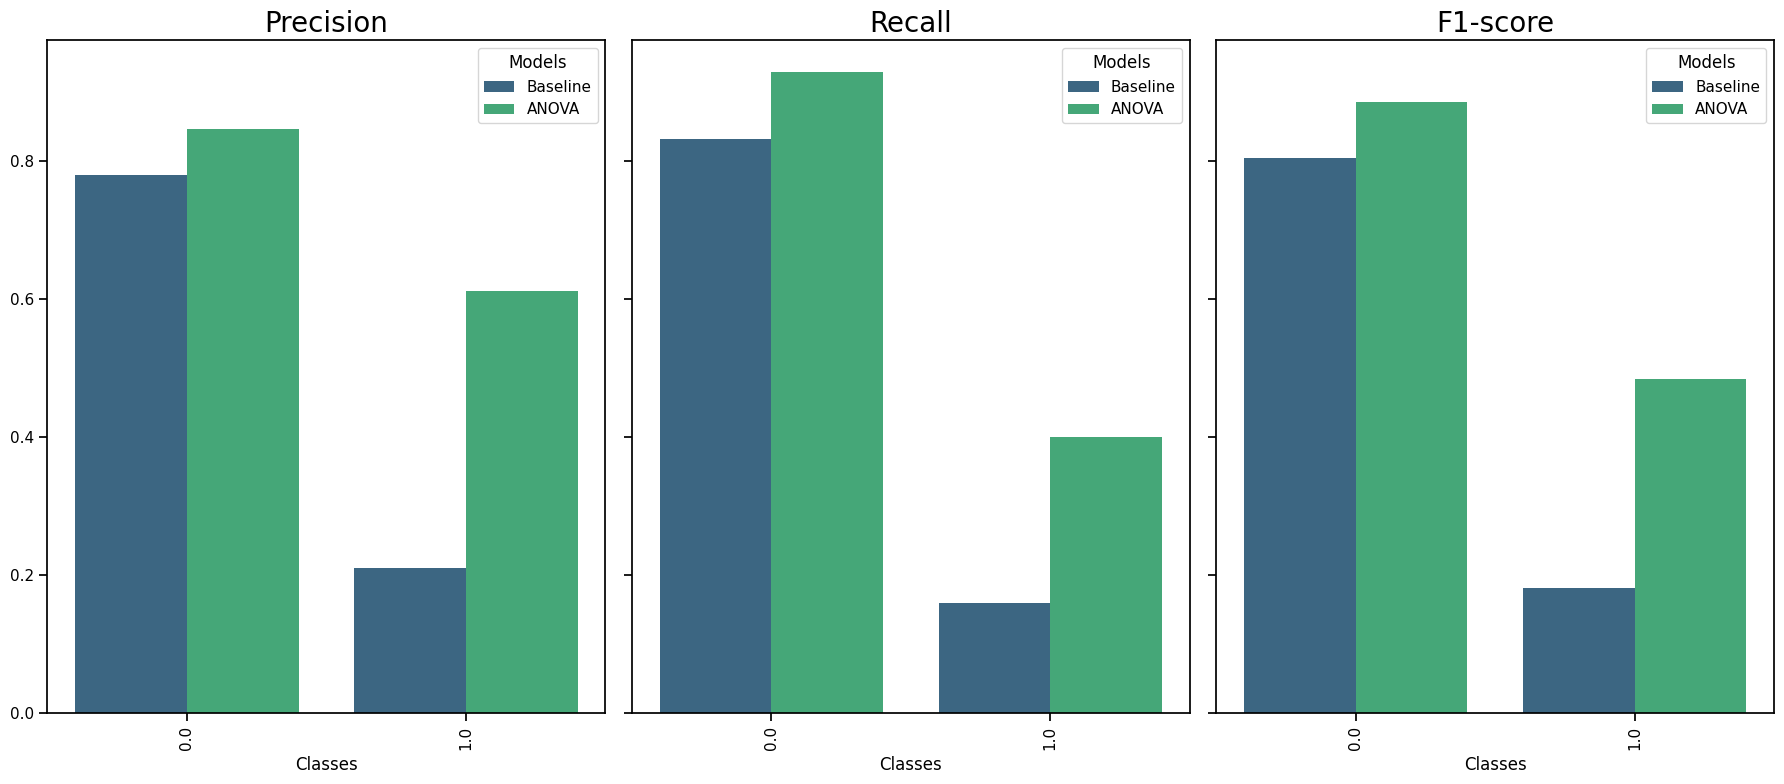

In [7]:
# plot comparisons
y_trues = [y_test_tensor.numpy(), y_test_tensor.numpy()]
y_preds = [y_pred_baseline, y_pred_anova]
model_names = ['Baseline', 'ANOVA']
plot_multiple_classification_reports(y_trues, y_preds, model_names)

#### Relationship Between Feature Selection and Model Selection

Feature selection and model selection are interconnected processes in machine learning, each influencing the other. Here are some key points that highlight their relationship:

1. **Model Sensitivity to Features**:
    - Different models can have varying sensitivities to the input features. For instance, linear models (like logistic regression) may perform well with a small set of highly relevant features, while non-linear models (like random forests and neural networks) can often handle a larger set of features, capturing complex interactions.

2. **Feature Selection Techniques**:
    - The choice of feature selection technique can be influenced by the type of model you plan to use. For example, univariate methods like ANOVA or mutual information are model-agnostic, while methods like Recursive Feature Elimination (RFE) or model-based selection (using feature importances from tree-based models) are model-specific.

3. **Performance and Feature Sets**:
    - Different models may achieve similar performance using different sets of features because of their inherent ability to capture patterns in the data. For example, a decision tree might rely on a specific set of features that are optimal for its splitting criteria, whereas a neural network might learn to combine features in a non-linear manner, allowing it to perform well with a different set.

4. **Redundancy and Interaction**:
    - Feature selection methods might select features that are highly correlated (redundant) or those that interact in complex ways. The ability of a model to handle these aspects can affect which features are deemed important. For instance, tree-based models handle feature interactions naturally, while linear models do not.

5. **Model Complexity and Overfitting**:
    - Simple models may benefit from aggressive feature selection to avoid overfitting, while complex models like neural networks might require more features to generalize well. The feature selection process should balance the need for simplicity and the ability to capture the underlying data distribution.

### Different Models with Different Feature Sets

It's possible for different models to achieve similar performance using different sets of features. This can occur because:

1. **Model Architecture**:
    - Models like neural networks can learn complex, non-linear relationships and interactions between features, potentially making use of features that linear models might not find useful.

2. **Model Training Dynamics**:
    - Different models might find different features to be important based on how they learn from the data. For example, a random forest might find certain features important due to its ensemble nature, while a support vector machine might find different features useful for defining the decision boundary.

### Practical Example

To demonstrate, we can use Random Forest and Neural Network models to see how they perform with different sets of features selected using feature importances from Random Forest and ANOVA.

### Summary

- **Different Models, Different Features**: Different models can indeed perform similarly using different sets of features because each model has its own way of utilizing the data.
- **Interconnection of Feature and Model Selection**: Feature selection impacts model performance, and the effectiveness of selected features can vary depending on the model.
- **Using Simpler Models for Feature Selection**: Using simpler models like Random Forests for initial feature selection can help streamline the process, which can then be transferred to more complex models like Neural Networks for final evaluation.

By understanding and leveraging the relationship between feature selection and model selection, you can optimize your machine learning pipeline to achieve better performance and efficiency.



#### Selecting K Best vs. Selecting Variables Manually

There is a difference between selecting K best features using an automated method like `SelectKBest` and selecting 10 variables manually. Here are the key differences:

1. **Selection Criteria**:
    - **K Best Selection**: Automated methods like `SelectKBest` use statistical tests or model-based importance scores to rank and select the top K features. This approach is objective and data-driven.
    - **Manual Selection**: Selecting variables manually relies on domain knowledge, intuition, or exploratory data analysis. This approach is subjective and may not always capture the most predictive features.

2. **Reproducibility**:
    - **K Best Selection**: The process is reproducible as it follows a systematic method based on statistical or model criteria.
    - **Manual Selection**: The process may vary between different individuals and may not be consistent across different iterations or analysts.

3. **Bias and Error**:
    - **K Best Selection**: Reduces human bias and error by relying on objective measures.
    - **Manual Selection**: Prone to human bias and error, potentially leading to the inclusion of irrelevant or redundant features.

4. **Scalability**:
    - **K Best Selection**: Scalable to large datasets and a large number of features, as it can quickly evaluate and rank features.
    - **Manual Selection**: Becomes impractical with large datasets or a large number of features due to the time and effort required.

5. **Adaptability**:
    - **K Best Selection**: Can easily adapt to changes in the data or the addition of new features.
    - **Manual Selection**: Requires re-evaluation and potential changes by the analyst, which can be time-consuming.


##### Comparison of the Two Methods

1. **Consistency and Objectivity**:
    - `SelectKBest` provides a consistent and objective way to select features based on statistical significance or model importance scores.
    - Manual selection can be inconsistent and subjective, relying heavily on the analyst's judgment.

2. **Performance**:
    - `SelectKBest` is likely to select features that are statistically significant or most predictive of the target variable, potentially leading to better model performance.
    - Manual selection may miss important features or include irrelevant ones, which could affect model performance.

3. **Effort and Scalability**:
    - `SelectKBest` is easy to implement and scales well to large datasets with many features.
    - Manual selection requires significant effort and may not be feasible for large datasets.

### Practical Approach

Given the benefits of automated feature selection methods, it's generally advisable to use methods like `SelectKBest` for initial feature selection. However, combining these methods with domain knowledge can further refine the selection process:

1. **Initial Selection with `SelectKBest`**:
    - Use `SelectKBest` to select the top K features based on statistical tests or model importance scores.

2. **Refinement with Domain Knowledge**:
    - Review the selected features and make adjustments based on domain knowledge and understanding of the problem.

By combining both approaches, you can leverage the strengths of objective, data-driven methods and subjective, domain-specific insights to achieve optimal feature selection.




## Random Forest

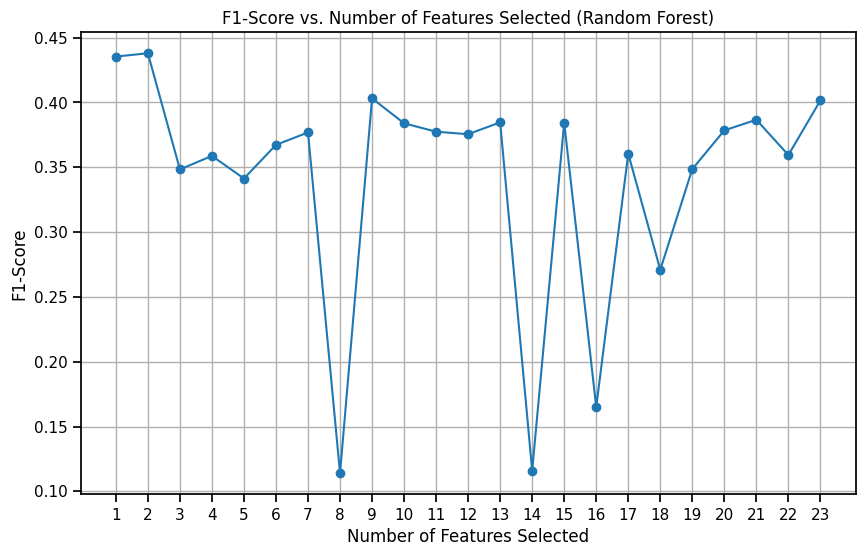

Optimal number of features: 2
Selected features with Random Forest: ['pay_0', 'age']


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline as SklearnPipeline
from sklearn.metrics import f1_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import torch
import matplotlib.pyplot as plt
import numpy as np

# Set random seed for reproducibility
def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

# Train a RandomForest model to get feature importances
def get_feature_importances(X_train, y_train):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    importances = model.feature_importances_
    feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
    feature_importances = feature_importances.sort_values(by='importance', ascending=False)
    return feature_importances

# Evaluate model performance with selected features
def evaluate_model_rf(X_train, y_train, X_test, y_test, selected_features):
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Apply RandomUnderSampler to balance the training dataset
    undersampler = RandomUnderSampler(sampling_strategy=0.75, random_state=42)
    X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_selected, y_train)

    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train_resampled.to_numpy(), dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train_resampled.to_numpy(), dtype=torch.float32).unsqueeze(1)
    X_test_tensor = torch.tensor(X_test_selected.to_numpy(), dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).unsqueeze(1)

    # Create an instance of SklearnSimpleNN with the adjusted weight
    nn_estimator = SklearnSimpleNN(input_dim=X_train_tensor.shape[1], pos_weight=class_weights[1])

    # Fit the model
    nn_estimator.fit(X_train_tensor.numpy(), y_train_tensor.numpy())

    # Predict on the test set with the optimal threshold
    y_pred = nn_estimator.predict(X_test_tensor.numpy())

    # Calculate F1-score
    f1 = f1_score(y_test_tensor.numpy(), y_pred)
    return f1, classification_report(y_test_tensor.numpy(), y_pred, output_dict=True), selected_features

# Select features and target (drop ID)
target = 'default_payment_next_month'
X = df.drop(columns=[target] + ['id'])
y = df[target]

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get feature importances from the RandomForest model
feature_importances = get_feature_importances(X_train, y_train)

# Range of values for the number of top features to select
k_values = range(1, len(feature_importances) + 1)

# Store F1-score and selected features for each value of k
f1_scores_rf = []
selected_features_list_rf = []

for k in k_values:
    top_features = feature_importances.head(k)['feature'].tolist()
    f1, report, selected_features = evaluate_model_rf(X_train, y_train, X_test, y_test, top_features)
    f1_scores_rf.append(f1)
    selected_features_list_rf.append(selected_features)
    # print(f"Top {k} features: {selected_features}")

# Plot the F1-scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, f1_scores_rf, marker='o')
plt.title('F1-Score vs. Number of Features Selected (Random Forest)')
plt.xlabel('Number of Features Selected')
plt.ylabel('F1-Score')
plt.xticks(k_values)
plt.grid()
plt.show()

# Find the optimal number of features
optimal_k_rf = k_values[np.argmax(f1_scores_rf)]
optimal_features_rf = selected_features_list_rf[np.argmax(f1_scores_rf)]

print(f"Optimal number of features: {optimal_k_rf}")
print(f"Selected features with Random Forest: {optimal_features_rf}")


In [9]:
print(f"Optimal number of features: {optimal_k_rf}")
print(f"Selected features with Random Forest: {optimal_features_rf}")

Optimal number of features: 2
Selected features with Random Forest: ['pay_0', 'age']


In [10]:
# Use the optimal features in the final pipeline
X_train_selected = X_train[optimal_features_rf]
X_test_selected = X_test[optimal_features_rf]

# Apply RandomUnderSampler to balance the training dataset
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_selected, y_train)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_resampled.to_numpy(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled.to_numpy(), dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_selected.to_numpy(), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).unsqueeze(1)

# Create an instance of SklearnSimpleNN with the adjusted weight
pos_weight = class_weights[1]
nn_estimator = SklearnSimpleNN(input_dim=X_train_tensor.shape[1], pos_weight=pos_weight)

# Fit the model
nn_estimator.fit(X_train_tensor.numpy(), y_train_tensor.numpy())

# Predict on the test set with the optimal threshold
y_pred_rf = nn_estimator.predict(X_test_tensor.numpy())

# Evaluate the model with the optimal threshold
print(classification_report(y_test_tensor.numpy(), y_pred_rf))


              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      4687
         1.0       0.69      0.32      0.44      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000



#### Model Comparison Plot

<Figure size 1200x800 with 0 Axes>

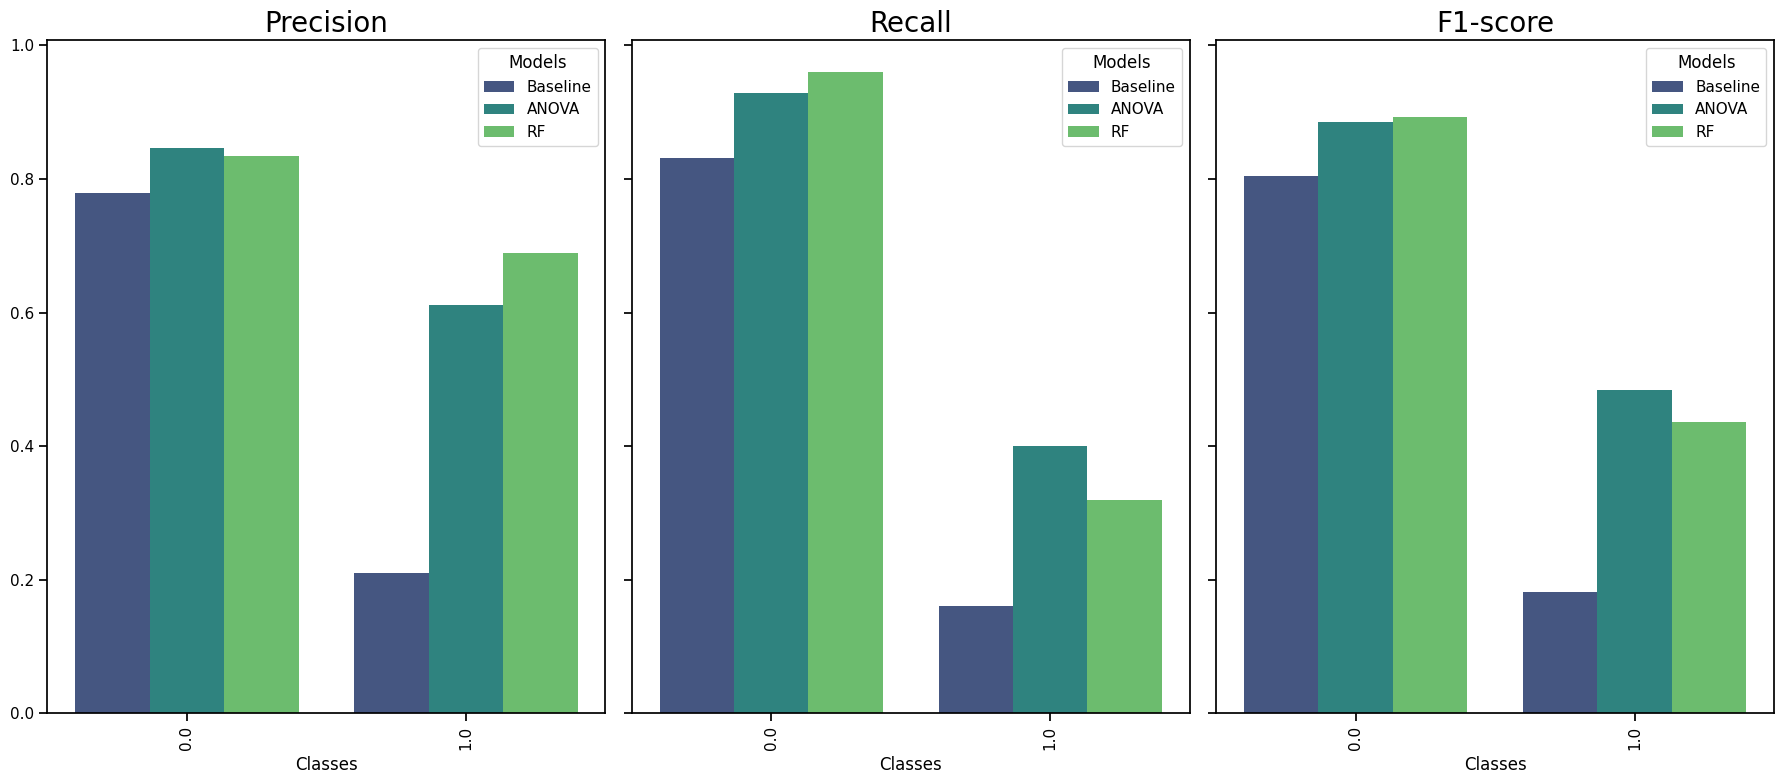

In [11]:
# plot comparisons
y_trues = [y_test_tensor.numpy(), y_test_tensor.numpy(), y_test_tensor.numpy()]
y_preds = [y_pred_baseline, y_pred_anova, y_pred_rf]
model_names = ['Baseline', 'ANOVA', 'RF']
plot_multiple_classification_reports(y_trues, y_preds, model_names)

## Principal Component Analysis (PCA)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


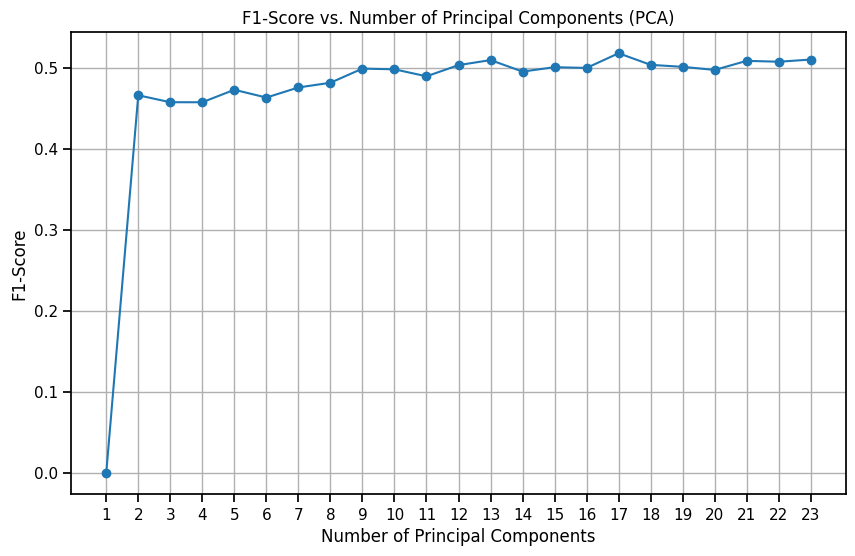

In [13]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline as SklearnPipeline
from sklearn.metrics import f1_score, classification_report
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from imblearn.under_sampling import RandomUnderSampler

# Set random seed for reproducibility
def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

# Assuming DataFramePreprocessor is defined
class DataFramePreprocessor:
    def __init__(self, preprocessor):
        self.preprocessor = preprocessor

    def fit(self, X, y=None):
        self.preprocessor.fit(X, y)
        return self

    def transform(self, X):
        return self.preprocessor.transform(X)

# Function to evaluate model performance with PCA
def evaluate_model_pca(X_train, y_train, X_test, y_test, n_components):
    # Create a new pipeline with preprocessing and PCA
    pca_pipeline = SklearnPipeline(steps=[
        ('preprocessor', DataFramePreprocessor(preprocessor)),
        ('pca', PCA(n_components=n_components))
    ])

    # Fit and transform the training data
    X_train_pca = pca_pipeline.fit_transform(X_train, y_train)
    X_test_pca = pca_pipeline.transform(X_test)

    # Apply RandomUnderSampler to balance the training dataset
    undersampler = RandomUnderSampler(sampling_strategy=0.75, random_state=42)
    X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_pca, y_train)

    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train_resampled.to_numpy(), dtype=torch.float32).unsqueeze(1)
    X_test_tensor = torch.tensor(X_test_pca, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).unsqueeze(1)

    # Create an instance of SklearnSimpleNN with the adjusted weight
    pos_weight = class_weights[1]
    nn_estimator = SklearnSimpleNN(input_dim=X_train_tensor.shape[1], pos_weight=pos_weight)

    # Fit the model
    nn_estimator.fit(X_train_tensor.numpy(), y_train_tensor.numpy())

    # Predict on the test set with the optimal threshold
    y_pred_pca = nn_estimator.predict(X_test_tensor.numpy())

    # Calculate F1-score
    f1 = f1_score(y_test_tensor.numpy(), y_pred_pca)
    return f1, classification_report(y_test_tensor.numpy(), y_pred_pca, output_dict=True)

# Select features and target (drop ID)
target = 'default_payment_next_month'
X = df.drop(columns=[target] + ['id'])
y = df[target]

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Range of values for the number of components
n_components_range = range(1, X_train.shape[1] + 1)

# Store F1-score for each value of n_components
f1_scores_pca = []

for n_components in n_components_range:
    f1, report = evaluate_model_pca(X_train, y_train, X_test, y_test, n_components)
    f1_scores_pca.append(f1)
    # print(f"Number of components: {n_components}, F1-score: {f1}")

# Plot the F1-scores
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, f1_scores_pca, marker='o')
plt.title('F1-Score vs. Number of Principal Components (PCA)')
plt.xlabel('Number of Principal Components')
plt.ylabel('F1-Score')
plt.xticks(n_components_range)
plt.grid()
plt.show()


In [14]:
# Find the optimal number of components
optimal_n_components = n_components_range[np.argmax(f1_scores_pca)]
print(f"Optimal number of principal components: {optimal_n_components}")

Optimal number of principal components: 17


In [15]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline as SklearnPipeline
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.under_sampling import RandomUnderSampler
import torch
import numpy as np
import pandas as pd

# Set random seed for reproducibility
def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

# Custom preprocessor to ensure output is a DataFrame
class DataFramePreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, preprocessor):
        self.preprocessor = preprocessor

    def fit(self, X, y=None):
        self.preprocessor.fit(X, y)
        return self

    def transform(self, X):
        X_transformed = self.preprocessor.transform(X)
        return pd.DataFrame(X_transformed)

# Assuming optimal_n_components is already determined
optimal_n_components = 12  # Replace with the actual optimal number of components from the PCA iteration

# Select features and target (drop ID)
target = 'default_payment_next_month'
X = df.drop(columns=[target] + ['id'])
y = df[target]

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Create a new pipeline with preprocessing and PCA
pca_pipeline = SklearnPipeline(steps=[
    ('preprocessor', DataFramePreprocessor(preprocessor)),
    ('pca', PCA(n_components=optimal_n_components))
])

# Fit and transform the training data
X_train_pca = pca_pipeline.fit_transform(X_train, y_train)
X_test_pca = pca_pipeline.transform(X_test)

# Apply RandomUnderSampler to balance the training dataset
undersampler = RandomUnderSampler(sampling_strategy=0.75, random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_pca, y_train)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled.to_numpy(), dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_pca, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).unsqueeze(1)

# Create an instance of SklearnSimpleNN with the adjusted weight
nn_estimator = SklearnSimpleNN(input_dim=X_train_tensor.shape[1], pos_weight=class_weights[1])

# Fit the model
nn_estimator.fit(X_train_tensor.numpy(), y_train_tensor.numpy())

# Predict on the test set with the optimal threshold
y_pred_pca = nn_estimator.predict(X_test_tensor.numpy())

# Evaluate the model with the optimal threshold
print(classification_report(y_test_tensor.numpy(), y_pred_pca))

              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88      4687
         1.0       0.59      0.42      0.49      1313

    accuracy                           0.81      6000
   macro avg       0.72      0.67      0.68      6000
weighted avg       0.79      0.81      0.80      6000



#### Model Comparison Plot

<Figure size 1200x800 with 0 Axes>

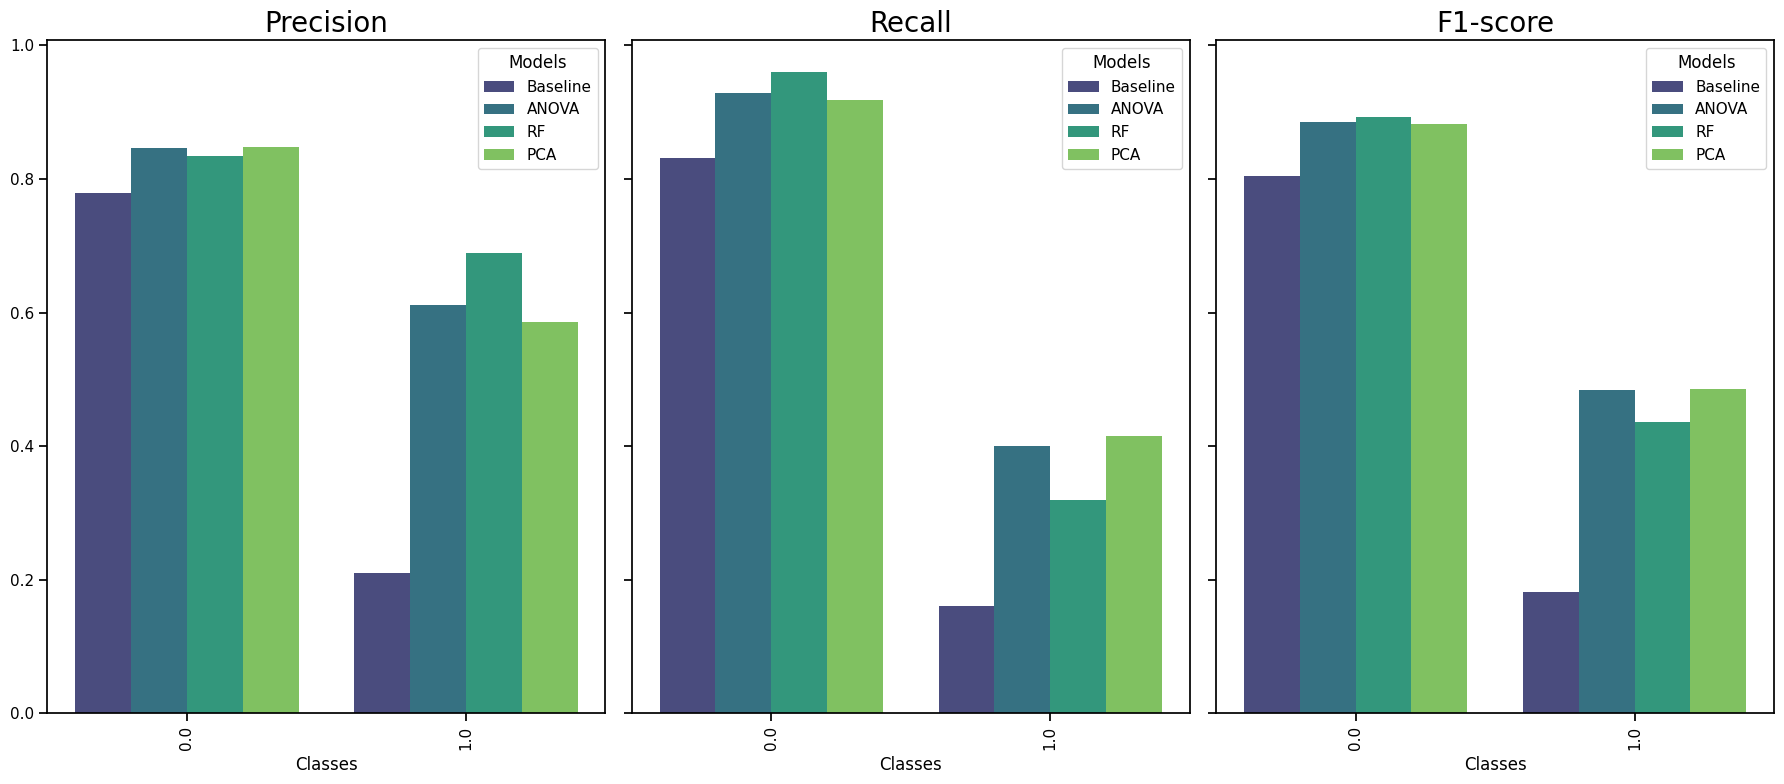

In [16]:
# plot comparisons
y_trues = [y_test_tensor.numpy(), y_test_tensor.numpy(), y_test_tensor.numpy(), y_test_tensor.numpy()]
y_preds = [y_pred_baseline, y_pred_anova, y_pred_rf, y_pred_pca]
model_names = ['Baseline', 'ANOVA', 'RF', 'PCA']
plot_multiple_classification_reports(y_trues, y_preds, model_names)

## Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline as SklearnPipeline
from sklearn.metrics import f1_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

# Select features and target (drop ID)
target = 'default_payment_next_month'
X = df.drop(columns=[target] + ['id'])
y = df[target]

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Function to evaluate model performance
def evaluate_model(X_train, y_train, X_test, y_test, selected_features):
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Apply RandomUnderSampler to balance the training dataset
    undersampler = RandomUnderSampler(sampling_strategy=0.75, random_state=42)
    X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_selected, y_train)

    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train_resampled.to_numpy(), dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train_resampled.to_numpy(), dtype=torch.float32).unsqueeze(1)
    X_test_tensor = torch.tensor(X_test_selected.to_numpy(), dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).unsqueeze(1)

    # Create an instance of SklearnSimpleNN with the adjusted weight
    pos_weight = class_weights[1]
    nn_estimator = SklearnSimpleNN(input_dim=X_train_tensor.shape[1], pos_weight=pos_weight)

    # Fit the model
    nn_estimator.fit(X_train_tensor.numpy(), y_train_tensor.numpy())

    # Predict on the test set with the optimal threshold
    y_pred = nn_estimator.predict(X_test_tensor.numpy())

    # Calculate F1-score
    f1 = f1_score(y_test_tensor.numpy(), y_pred)
    return f1, classification_report(y_test_tensor.numpy(), y_pred, output_dict=True), selected_features

# Using RFE with a Random Forest estimator to get feature rankings
rf_model = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=rf_model, n_features_to_select=1)
rfe.fit(X_train, y_train)

# Get the ranking of features
ranking = rfe.ranking_
feature_ranking = pd.DataFrame({'feature': X_train.columns, 'ranking': ranking})
feature_ranking = feature_ranking.sort_values(by='ranking')

# Range of values for the number of top features to select
k_values = range(1, len(feature_ranking) + 1)

# Store F1-score and selected features for each value of k
f1_scores_RFE = []
selected_features_list_RFE = []

for k in k_values:
    top_features = feature_ranking.head(k)['feature'].tolist()
    f1, report, selected_features = evaluate_model(X_train, y_train, X_test, y_test, top_features)
    f1_scores_RFE.append(f1)
    selected_features_list_RFE.append(selected_features)
    # print(f"Top {k} features: {selected_features}")

# Plot the F1-scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, f1_scores_RFE, marker='o')
plt.title('F1-Score vs. Number of Features Selected (RFE with Random Forest)')
plt.xlabel('Number of Features Selected')
plt.ylabel('F1-Score')
plt.xticks(k_values)
plt.grid()
plt.show()

# Find the optimal number of features
optimal_k_RFE = k_values[np.argmax(f1_scores_RFE)]
optimal_features_RFE = selected_features_list_RFE[np.argmax(f1_scores_RFE)]

In [16]:
print(f"Optimal number of features: {optimal_k_RFE}")
print(f"Selected features with Random Forest: {optimal_features_RFE}")

Optimal number of features: 2
Selected features with Random Forest: 5    pay_0
4      age
Name: feature, dtype: object


In [ ]:
# Use the optimal features in the final pipeline
X_train_selected = X_train[optimal_features_RFE]
X_test_selected = X_test[optimal_features_RFE]

# Apply RandomUnderSampler to balance the training dataset
undersampler = RandomUnderSampler(sampling_strategy=0.75, random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_selected, y_train)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_resampled.to_numpy(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled.to_numpy(), dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_selected.to_numpy(), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).unsqueeze(1)

# Create an instance of SklearnSimpleNN with the adjusted weight
pos_weight = class_weights[1]
nn_estimator = SklearnSimpleNN(input_dim=X_train_tensor.shape[1], pos_weight=pos_weight)

# Fit the model
nn_estimator.fit(X_train_tensor.numpy(), y_train_tensor.numpy())

# Predict on the test set with the optimal threshold
y_pred_rfe = nn_estimator.predict(X_test_tensor.numpy())

# Evaluate the model with the optimal threshold
print(classification_report(y_test_tensor.numpy(), y_pred_rfe))


Iterating through feature subsets can be less computationally expensive compared to using RFE directly with a neural network, especially if you limit the number of subsets and the size of each subset. Here’s a streamlined approach to achieve this:

### Iterate Through Feature Subsets

1. **Use Feature Importances from Random Forest:** Utilize the Random Forest model to rank features by importance.
2. **Create Feature Subsets:** Generate subsets of features based on their importance.
3. **Evaluate Performance:** Evaluate the neural network's performance on each subset.
4. **Select Optimal Features:** Choose the subset that gives the best performance.

Here’s how you can implement this approach:










### Summary:
- **Less Computationally Expensive:** Iterating through feature subsets using predefined importance can be less computationally expensive than RFE with a neural network.
- **Optimal Features:** Select the best subset of features based on neural network performance rather than just feature importance from another model.
- **Flexible and Efficient:** This approach balances flexibility and computational efficiency, ensuring you get a good feature set without overloading computational resources.

In [18]:
### Step 1: Use Feature Importances from Random Forest

from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Function to get feature importances from RandomForest
def get_feature_importances(X_train, y_train):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    importances = model.feature_importances_
    feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
    feature_importances = feature_importances.sort_values(by='importance', ascending=False)
    return feature_importances

# Ensure the target is not included in the features
# Select features and target (drop ID)
target = 'default_payment_next_month'
X = df.drop(columns=[target] + ['id'])
y = df[target]

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get feature importances from the RandomForest model
feature_importances = get_feature_importances(X_train, y_train)

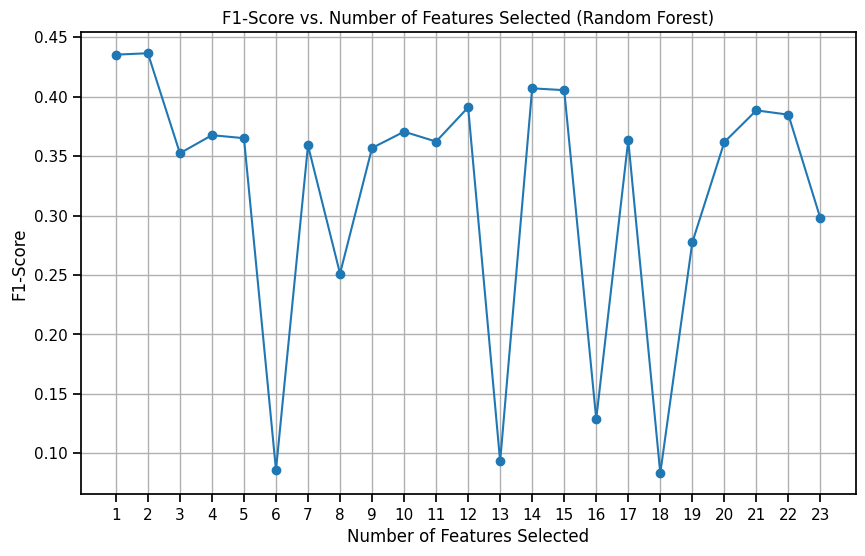

Optimal number of features: 2
Selected features: ['pay_0', 'age']


In [20]:
### Step 2: Create Feature Subsets and Step 3: Evaluate Performance

from sklearn.metrics import f1_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
import torch
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Function to evaluate model performance
def evaluate_model(X_train, y_train, X_test, y_test, selected_features):
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Apply RandomUnderSampler to balance the training dataset
    undersampler = RandomUnderSampler(sampling_strategy=0.75, random_state=42)
    X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_selected, y_train)

    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train_resampled.to_numpy(), dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train_resampled.to_numpy(), dtype=torch.float32).unsqueeze(1)
    X_test_tensor = torch.tensor(X_test_selected.to_numpy(), dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).unsqueeze(1)

    # Create an instance of SklearnSimpleNN with the adjusted weight
    pos_weight = class_weights[1]
    nn_estimator = SklearnSimpleNN(input_dim=X_train_tensor.shape[1], pos_weight=pos_weight)

    # Fit the model
    nn_estimator.fit(X_train_tensor.numpy(), y_train_tensor.numpy())

    # Predict on the test set with the optimal threshold
    y_pred = nn_estimator.predict(X_test_tensor.numpy())

    # Calculate F1-score
    f1 = f1_score(y_test_tensor.numpy(), y_pred)
    return f1, classification_report(y_test_tensor.numpy(), y_pred, output_dict=True), selected_features

# Range of values for the number of top features to select
k_values = range(1, len(feature_importances) + 1)

# Store F1-score and selected features for each value of k
f1_scores = []
selected_features_list = []

for k in k_values:
    top_features = feature_importances.head(k)['feature'].tolist()
    f1, report, selected_features = evaluate_model(X_train, y_train, X_test, y_test, top_features)
    f1_scores.append(f1)
    selected_features_list.append(selected_features)
    # print(f"Top {k} features: {selected_features}")

# Plot the F1-scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, f1_scores, marker='o')
plt.title('F1-Score vs. Number of Features Selected (Random Forest)')
plt.xlabel('Number of Features Selected')
plt.ylabel('F1-Score')
plt.xticks(k_values)
plt.grid()
plt.show()

# Find the optimal number of features
optimal_k = k_values[np.argmax(f1_scores)]
optimal_features = selected_features_list[np.argmax(f1_scores)]

print(f"Optimal number of features: {optimal_k}")
print(f"Selected features: {optimal_features}")

In [21]:
#### Step 4: Incorporate the Optimal Features into the Final Pipeline

X_train_selected = X_train[optimal_features]
X_test_selected = X_test[optimal_features]

# Apply RandomUnderSampler to balance the training dataset
undersampler = RandomUnderSampler(sampling_strategy=0.75, random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_selected, y_train)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_resampled.to_numpy(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled.to_numpy(), dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_selected.to_numpy(), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).unsqueeze(1)

# Create an instance of SklearnSimpleNN with the adjusted weight
pos_weight = class_weights[1]
nn_estimator = SklearnSimpleNN(input_dim=X_train_tensor.shape[1], pos_weight=pos_weight)

# Fit the model
nn_estimator.fit(X_train_tensor.numpy(), y_train_tensor.numpy())

# Predict on the test set with the optimal threshold
y_pred_rfe = nn_estimator.predict(X_test_tensor.numpy())

# Evaluate the model with the optimal threshold
print(classification_report(y_test_tensor.numpy(), y_pred_rfe))

              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      4687
         1.0       0.69      0.32      0.44      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000



## Final Comparsion & Analysis

<Figure size 1200x800 with 0 Axes>

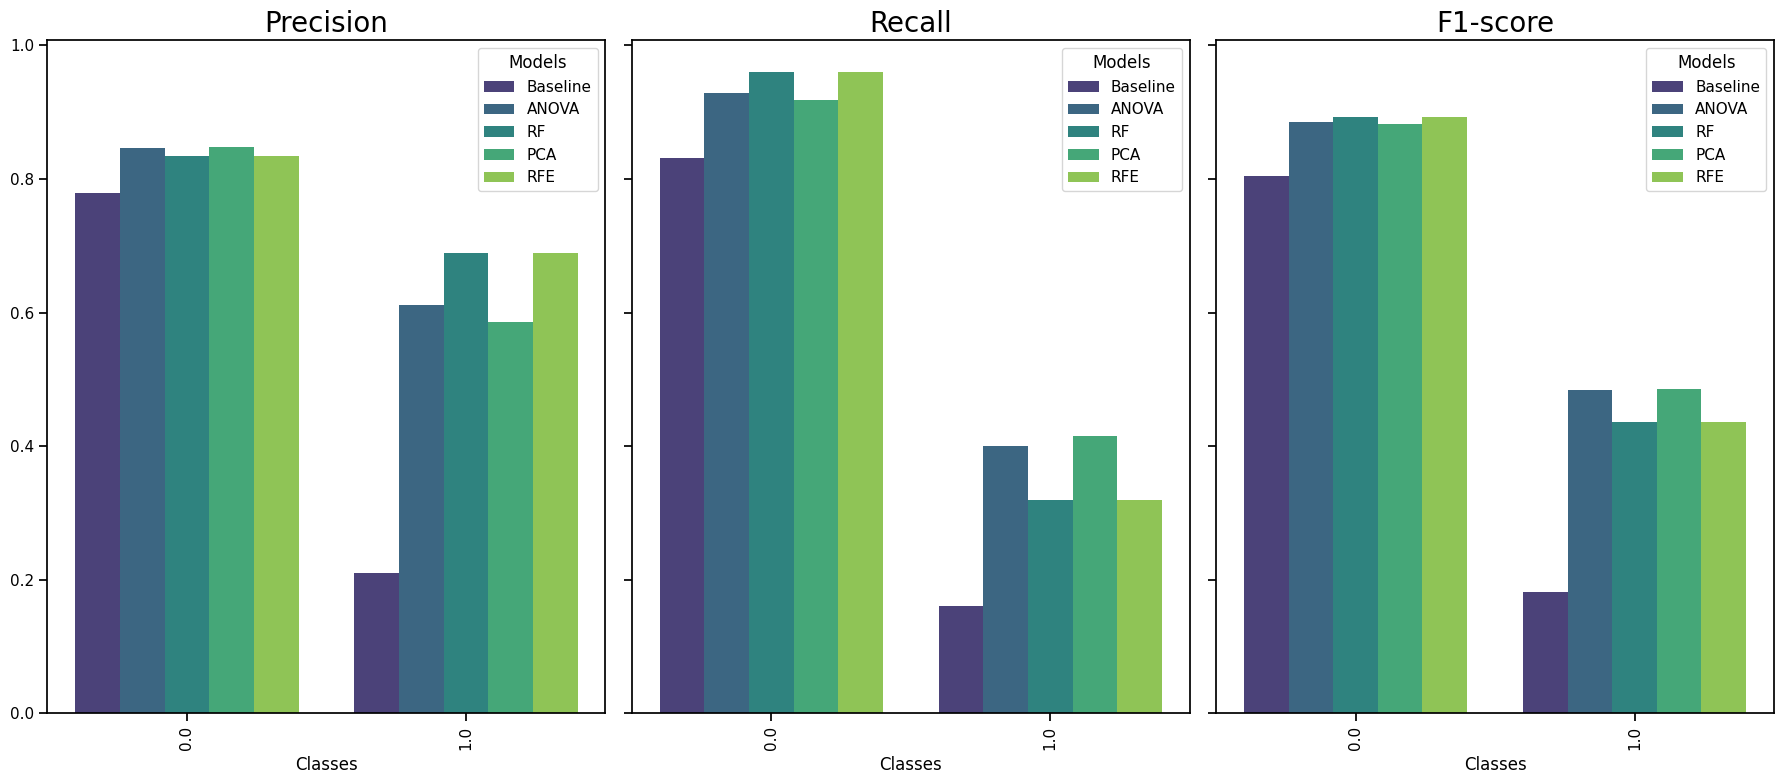

In [22]:
# plot comparisons
y_trues = [y_test_tensor.numpy(), y_test_tensor.numpy(), y_test_tensor.numpy(),
           y_test_tensor.numpy(), y_test_tensor.numpy()]
y_preds = [y_pred_baseline, y_pred_anova, y_pred_rf, y_pred_pca, y_pred_rfe]
model_names = ['Baseline', 'ANOVA', 'RF', 'PCA', 'RFE']
plot_multiple_classification_reports(y_trues, y_preds, model_names)

In [23]:
import pandas as pd
from sklearn.metrics import classification_report

y_trues = [y_test_tensor.numpy(), y_test_tensor.numpy(), y_test_tensor.numpy(),
           y_test_tensor.numpy(), y_test_tensor.numpy()]
y_preds = [y_pred_baseline, y_pred_anova, y_pred_rf, y_pred_pca, y_pred_rfe]
model_names = ['Baseline', 'ANOVA', 'RF', 'PCA', 'RFE']

# Function to extract metrics from classification report
def extract_metrics(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
    metrics_df = pd.DataFrame(report).transpose().drop(['accuracy', 'macro avg', 'weighted avg'])
    metrics_df['model'] = model_name
    return metrics_df[['precision', 'recall', 'f1-score', 'model']]

# Compile all metrics into a single DataFrame
metrics_list = [extract_metrics(y_true, y_pred, model_name) for y_true, y_pred, model_name in zip(y_trues, y_preds, model_names)]
summary_table = pd.concat(metrics_list).reset_index().rename(columns={'index': 'class'})

# Display the summary table
summary_table_pivot = summary_table.pivot(index='class', columns='model', values=['precision', 'recall', 'f1-score'])
summary_table_pivot = summary_table_pivot.sort_index(axis=1, level=1)  # Sort columns by model name
summary_table_pivot.columns = [f'{metric} ({model})' for metric, model in summary_table_pivot.columns]
summary_table_pivot.reset_index(inplace=True)
summary_table_pivot.T


,0,1
class,0.0,1.0
f1-score (ANOVA),0.885927,0.484123
precision (ANOVA),0.846887,0.611628
recall (ANOVA),0.928739,0.400609
f1-score (Baseline),0.804707,0.181661
precision (Baseline),0.779444,0.21021
recall (Baseline),0.831662,0.159939
f1-score (PCA),0.881714,0.48574
precision (PCA),0.848491,0.585392
recall (PCA),0.917645,0.41508


### Choosing the Best Method

To determine the best feature selection method, let's analyze the classification metrics provided for each method: ANOVA, Baseline, PCA, Random Forest (RF), and Recursive Feature Elimination (RFE). Here’s a summary of the metrics:

#### Class 0:
- **ANOVA**: f1-score: 0.886, precision: 0.847, recall: 0.929
- **Baseline**: f1-score: 0.805, precision: 0.779, recall: 0.832
- **PCA**: f1-score: 0.882, precision: 0.848, recall: 0.918
- **RF**: f1-score: 0.893, precision: 0.834, recall: 0.960
- **RFE**: f1-score: 0.893, precision: 0.834, recall: 0.960

#### Class 1:
- **ANOVA**: f1-score: 0.484, precision: 0.612, recall: 0.401
- **Baseline**: f1-score: 0.182, precision: 0.210, recall: 0.160
- **PCA**: f1-score: 0.486, precision: 0.585, recall: 0.415
- **RF**: f1-score: 0.436, precision: 0.689, recall: 0.319
- **RFE**: f1-score: 0.436, precision: 0.689, recall: 0.319

### Analysis and Comparison:
1. **ANOVA**:
   - **Class 0**: High f1-score (0.886), precision (0.847), and recall (0.929).
   - **Class 1**: Moderate f1-score (0.484), precision (0.612), and recall (0.401).

2. **Baseline**:
   - **Class 0**: Lowest f1-score (0.805), precision (0.779), and recall (0.832).
   - **Class 1**: Lowest f1-score (0.182), precision (0.210), and recall (0.160).

3. **PCA**:
   - **Class 0**: High f1-score (0.882), precision (0.848), and recall (0.918).
   - **Class 1**: Highest f1-score (0.486), precision (0.585), and recall (0.415).

4. **RF**:
   - **Class 0**: Highest f1-score (0.893), precision (0.834), and recall (0.960).
   - **Class 1**: Moderate f1-score (0.436), highest precision (0.689), and low recall (0.319).

5. **RFE**:
   - Metrics identical to RF, indicating similar performance.

### Choosing the Best Method:
**PCA** stands out as the best feature selection method based on the provided metrics. Here's why:

1. **Balanced Performance**:
   - **Class 0**: PCA has a high f1-score (0.882), precision (0.848), and recall (0.918), which is comparable to the highest scores achieved by RF and RFE.
   - **Class 1**: PCA has the highest f1-score (0.486) among all methods, indicating better balance in handling both classes. Precision (0.585) and recall (0.415) are also relatively high.

2. **Trade-off between Precision and Recall**:
   - **Precision and Recall**: PCA manages a good balance between precision and recall for class 1. Although RF and RFE have higher precision (0.689), their recall (0.319) is significantly lower than PCA’s (0.415), indicating PCA performs better in identifying true positives for class 1.

### Conclusion:

**PCA** is the preferred feature selection method because it achieves the highest balanced f1-score for class 1 while maintaining high performance for class 0. This balance indicates that PCA is more effective in handling both classes compared to the other methods, making it the best overall choice based on the provided metrics.




## Final Pipeline with PCA

In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.utils.class_weight import compute_class_weight

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
df = pd.read_excel(url, header=1)

# Rename columns to lower case and replace spaces with underscores
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

# Convert specific numeric columns to categorical
categorical_columns = ['sex', 'education', 'marriage']
df[categorical_columns] = df[categorical_columns].astype('category')

# Select features and target
target = 'default_payment_next_month'
X = df.drop(columns=[target])
y = df[target]

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify column types
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Define preprocessing for numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define preprocessing for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Set random seed for reproducibility
def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

# Custom preprocessor to ensure output is a DataFrame
class DataFramePreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, preprocessor):
        self.preprocessor = preprocessor

    def fit(self, X, y=None):
        self.preprocessor.fit(X, y)
        return self

    def transform(self, X):
        X_transformed = self.preprocessor.transform(X)
        return pd.DataFrame(X_transformed)

# Optimal number of principal components determined from PCA iteration
optimal_n_components = 17

# Create a new pipeline with preprocessing and PCA
pca_pipeline = Pipeline(steps=[
    ('preprocessor', DataFramePreprocessor(preprocessor)),
    ('pca', PCA(n_components=optimal_n_components))
])

# Fit and transform the training data
X_train_pca = pca_pipeline.fit_transform(X_train, y_train)
X_test_pca = pca_pipeline.transform(X_test)

# Apply RandomUnderSampler to balance the training dataset
undersampler = RandomUnderSampler(sampling_strategy=0.75, random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_pca, y_train)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled.to_numpy(), dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_pca, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).unsqueeze(1)

optimal_threshold = 0.8000141978263855

# Define a simple neural network model
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the sklearn wrapper for the neural network model
class SklearnSimpleNN(BaseEstimator, ClassifierMixin):
    def __init__(self, input_dim, learning_rate=0.001, epochs=50, batch_size=64, pos_weight=1.0):
        self.input_dim = input_dim
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.pos_weight = pos_weight  # Accept as float
        self.model = SimpleNN(self.input_dim)

    def fit(self, X, y):
        # Convert pos_weight to tensor here
        criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor(self.pos_weight, dtype=torch.float32))
        optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        train_dataset = torch.utils.data.TensorDataset(torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32).unsqueeze(1))
        train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)

        for epoch in range(self.epochs):
            self.model.train()
            for inputs, targets in train_loader:
                optimizer.zero_grad()
                outputs = self.model(inputs)
                loss = criterion(outputs, targets.view(-1, 1))
                loss.backward()
                optimizer.step()
        return self

    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            outputs = self.model(torch.tensor(X, dtype=torch.float32))
            probabilities = torch.sigmoid(outputs)
            predictions = (probabilities > optimal_threshold).float()  # Use the manually adjusted threshold here
        return predictions.numpy().squeeze()

# Calculate the class weights
class_weights = len(y_train) / (2 * np.bincount(y_train))

# Create an instance of SklearnSimpleNN with the adjusted weight
input_dim = X_train_tensor.shape[1]
nn_estimator = SklearnSimpleNN(input_dim=input_dim, pos_weight=class_weights[1])

# Fit the model
nn_estimator.fit(X_train_tensor.numpy(), y_train_tensor.numpy())

# Predict on the test set with the optimal threshold
y_pred_pca = nn_estimator.predict(X_test_tensor.numpy())

# Evaluate the model with the optimal threshold
print(classification_report(y_test_tensor.numpy(), y_pred_pca))


              precision    recall  f1-score   support

         0.0       0.85      0.92      0.89      4673
         1.0       0.61      0.42      0.50      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.67      0.69      6000
weighted avg       0.80      0.81      0.80      6000

